# Análisis final

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Lo primero que hemos hecho ha sido cargar todos los datos que hemos generado y guardado en csv en los pasos anteriores de formateo.

En este primer paso lo que nos interesa es solamente los ficheros con los pagos, por ello filtramos aquellos que contengan la palabra 'payment' en el nombre ya que todos empiezan su nombre como `payment_`.

Además de esto, hemos visto que hay varios ficheros que suman un total de 0EUR en movimientos, así que estos los descartamos ya que no nos interesan para nuestro estudio.

In [2]:
input_files_path = './input'
files = os.listdir(input_files_path)

df = pd.DataFrame(columns=['filename', 'amount'])

for file in files:
    if os.path.isfile(os.path.join(input_files_path, file)):
        if 'payment' in file:
            path = os.path.join(input_files_path, file)
            entities = pd.read_csv(path)
            amount = entities.amount.sum()
            if amount != 0.0:
                df = df.append({'filename': file, 'amount': amount}, ignore_index=True)

Después de tener los totales de cada fichero los ordenamos y le damos formato a las cantidades para una representación más cómoda.

In [3]:
pd.options.display.float_format = '{:.2f}'.format
df.sort_values(by='amount', ascending=False)

,filename,amount
10,payment_trimloc2017-econ-ingr-importes_Estimac...,436847778.46
11,payment_trimloc2017-econ-ingr-importes_Estimac...,436813581.23
4,payment_trimloc2017-econ-gast-importes_Estimac...,378481403.26
5,payment_trimloc2017-econ-gast-importes_Estimac...,375702492.11
14,payment_trimloc2017-remt_ImporteEjercicioActua...,287242552.08
9,payment_trimloc2017-econ-ingr-importes_Derecho...,53977408.64
13,payment_trimloc2017-econ-ingr-importes_Recauda...,53811324.38
6,payment_trimloc2017-econ-gast-importes_Obligac...,25892861.08
8,payment_trimloc2017-econ-gast-importes_PagosRe...,25640767.79
7,payment_trimloc2017-econ-gast-importes_PagosLi...,19449643.77


## Entidades

En este punto cargamos las entidades y hacemos varios análisis exploratorios. Vemos que pinta tienen los datos, como podemos conectarlos, que sentido le podemos dar, etc.

In [4]:
entities = pd.read_csv('./input/entities.csv')
entities.describe()

,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
count,1049,1049,1049,738,310,1048,310
unique,1049,1,1,738,5,10,303
top,IdContextoDatosBasicos,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-ingr-cuentas:EconomicaIngresos,trimloc2017-anexo5:Filasdimension,trimloc2017-econ-gast:Cuentasdimension,Primer aval
freq,1,1049,1049,1,300,372,4


In [5]:
entities['typed_member'].unique()

array([nan,
       'trimloc2017-anexo4:AvalesEjecutadosClasificacionEconomicaDeGastosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesReintegradosClasificacionEconomicaDeIngresosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesEjecutadosConceptosNoPresupuestariosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesReintegradosConceptosNoPresupuestariosDimensionDeFilas',
       'trimloc2017-anexo5:Filasdimension'], dtype=object)

In [6]:
anexo5_Capitulo2 = pd.read_csv('./input/payment_trimloc2017-anexo5_Capitulo2.csv', index_col=0)
anexo5_Capitulo2 = anexo5_Capitulo2[anexo5_Capitulo2.amount != 0.0]
anexo5_Capitulo2.head()

,decimals,reference,currency,amount
0,0,IdContextosAnexo5_Transferencia1,euro,10.79
2,0,IdContextosAnexo5_Transferencia3,euro,776.21
5,0,IdContextosAnexo5_Transferencia6,euro,96.60
6,0,IdContextosAnexo5_Transferencia7,euro,154.54


In [7]:
anexo5_Capitulo2.describe()

,decimals,amount
count,4.00,4.00
mean,0.00,259.54
std,0.00,349.48
min,0.00,10.79
25%,0.00,75.15
50%,0.00,125.57
75%,0.00,309.96
max,0.00,776.21


In [8]:
EstimacionCreditosDefinitivosAFinEjercicioCorriente = pd.read_csv('./input/payment_trimloc2017-econ-gast-importes_EstimacionCreditosDefinitivosAFinEjercicioCorriente.csv', index_col=0)
EstimacionCreditosDefinitivosAFinEjercicioCorriente = EstimacionCreditosDefinitivosAFinEjercicioCorriente[EstimacionCreditosDefinitivosAFinEjercicioCorriente.amount != 0.0]
EstimacionCreditosDefinitivosAFinEjercicioCorriente.head()

,decimals,reference,currency,amount
0,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93
1,2,IdContextosEconomicaGastos_RetribucionesBasica...,euro,993006.93
2,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93
3,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,101119.27
4,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,156655.90


In [9]:
EstimacionCreditosDefinitivosAFinEjercicioCorriente.describe()

,decimals,amount
count,167.00,167.00
mean,2.00,2266355.71
std,0.00,5809076.31
min,2.00,700.00
25%,2.00,49489.85
50%,2.00,213917.93
75%,2.00,1074775.59
max,2.00,35330539.20


In [10]:
reference = EstimacionCreditosDefinitivosAFinEjercicioCorriente.reference[0]

In [11]:
entities[entities.id == reference]

,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
573,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN


In [12]:
merged = EstimacionCreditosDefinitivosAFinEjercicioCorriente.merge(entities, right_on='id', left_on='reference')
merged.head()

,decimals,reference,currency,amount,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
0,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
1,2,IdContextosEconomicaGastos_RetribucionesBasica...,euro,993006.93,IdContextosEconomicaGastos_RetribucionesBasica...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:RetribucionesBas...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
2,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
3,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,101119.27,IdContextosEconomicaGastos_PersonalEventual_Re...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:PersonalEventual...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
4,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,156655.90,IdContextosEconomicaGastos_PersonalEventual_Re...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:PersonalEventual...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN


## Mezcla de datos

Tras varias pruebas hemos visto que podemos unir los datos de los pagos con las entidades según la referencia que tengan estas y el ID de cada pago.  

Para esto lo que hacemos es primeramente mezclar cada fichero de pagos con las entidades y con esta mezcla crear un dataset nuevo con todos los pagos y las entidades concatenadas.

In [13]:
all_payments = None
for file in files:
    if os.path.isfile(os.path.join(input_files_path, file)):
        if 'payment_' in file:
            path = os.path.join(input_files_path, file)
            payments = pd.read_csv(path, index_col=0)
            merged = payments.merge(entities, right_on='id', left_on='reference', how='left')

            if all_payments is None:
                all_payments = merged
            else:
                all_payments = pd.concat([all_payments, merged])

all_payments

,decimals,reference,currency,amount,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
0,2,IdContextosAnexo1_InteresesDeDeudaPublica,euro,0.00,IdContextosAnexo1_InteresesDeDeudaPublica,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDeudaPublica,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
1,2,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,euro,0.00,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDePrestamosYOtrasO...,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
2,2,IdContextosAnexo1_InteresesDeDepositosYFianzas,euro,0.00,IdContextosAnexo1_InteresesDeDepositosYFianzas,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDepositosYFianzas,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
3,2,IdContextosAnexo1_OtrosIntereses352y358,euro,0.00,IdContextosAnexo1_OtrosIntereses352y358,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:OtrosIntereses352y358,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
4,2,IdContextosAnexo1_EjecucionDeAvales357,euro,0.00,IdContextosAnexo1_EjecucionDeAvales357,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:EjecucionDeAvales357,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14,2,R42,euro,1776599.45,R42,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:ExcesoDeFinanciacionAfectada,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
15,2,R49t,euro,63588850.58,R49t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:RemanenteDeTesoreriaParaGasto...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
16,2,R59t,euro,210410.12,R59t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPendientes...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
17,2,R69t,euro,131.25,R69t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPorDevoluc...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN


In [14]:
all_payments.id.describe()

count                                                  1629
unique                                                  294
top       IdContextosEconomicaGastos_TransferenciasCorri...
freq                                                      6
Name: id, dtype: object

In [15]:
all_payments.amount.sum()


2095730562.7099998

In [16]:
all_payments.to_csv('output/all_payments.csv')

## Agrupemos

Ahora toca el turno de agrupar y visualizar. En esta parte nos hemos puesto a agrupar este dataset con todos los pagos y entidades por diferentes campos para ver si podemos llegar a alguna conclusión. Además, para que sea más fácil de comprender hemos pintado algunas gráficas.

In [17]:
group_payments = all_payments[all_payments.amount != 0.0] # remove before sum to avoid errors
group_payments = group_payments.groupby('id').sum()
group_payments = group_payments.sort_values(by='amount', ascending=False)

In [18]:
group_payments.to_csv('output/payments_group_by_id.csv', index_label='index')

<AxesSubplot:xlabel='amount', ylabel='id'>

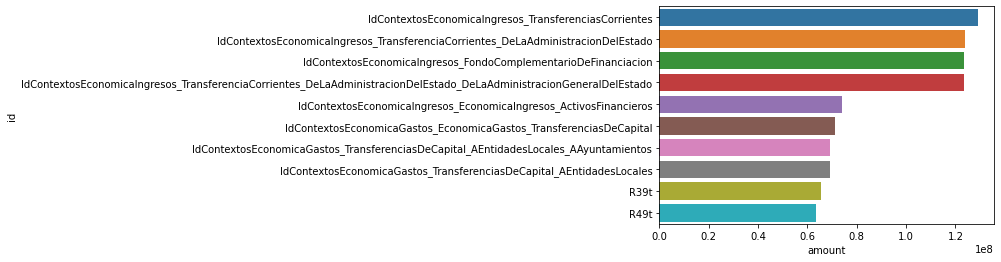

In [19]:
top_10_payments = group_payments.head(10)
sns.barplot(x=top_10_payments['amount'], y=top_10_payments.index)

<AxesSubplot:xlabel='amount', ylabel='id'>

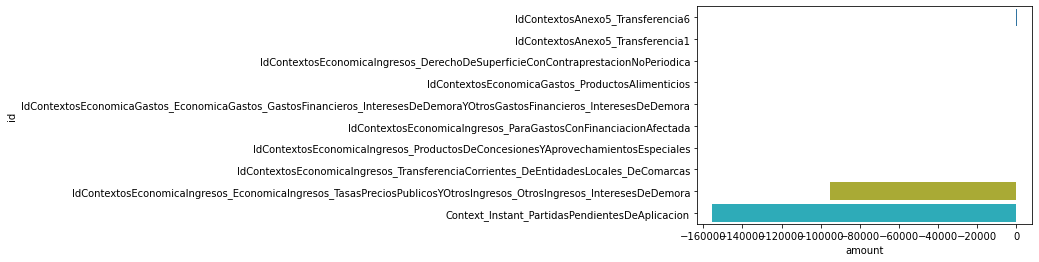

In [20]:
botton_10_payments = group_payments.tail(10)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [21]:
group_payments_without_empties = group_payments[group_payments.amount != 0.0]
group_payments_without_empties.shape

(284, 2)

<AxesSubplot:xlabel='amount', ylabel='id'>

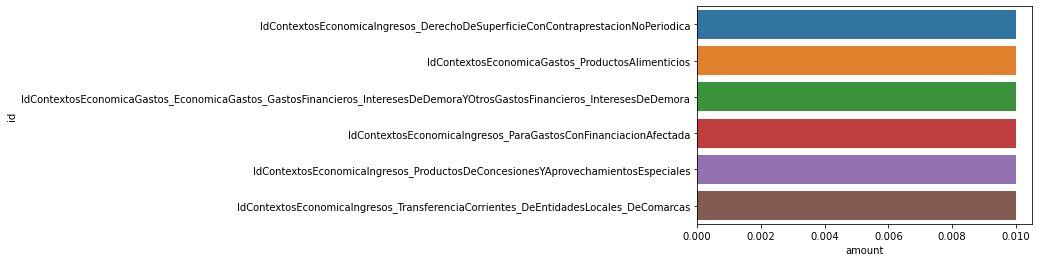

In [22]:
botton_10_payments = group_payments_without_empties[:-2].tail(6)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [23]:
botton_10_payments

,decimals,amount
id,,
IdContextosEconomicaIngresos_DerechoDeSuperficieConContraprestacionNoPeriodica,4,0.01
IdContextosEconomicaGastos_ProductosAlimenticios,4,0.01
IdContextosEconomicaGastos_EconomicaGastos_GastosFinancieros_InteresesDeDemoraYOtrosGastosFinancieros_InteresesDeDemora,4,0.01
IdContextosEconomicaIngresos_ParaGastosConFinanciacionAfectada,4,0.01
IdContextosEconomicaIngresos_ProductosDeConcesionesYAprovechamientosEspeciales,4,0.01
IdContextosEconomicaIngresos_TransferenciaCorrientes_DeEntidadesLocales_DeComarcas,4,0.01


<AxesSubplot:xlabel='amount', ylabel='id'>

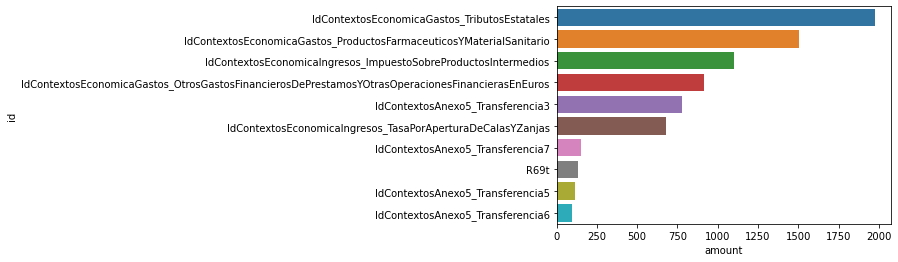

In [24]:
botton_10_payments = group_payments_without_empties[:-9].tail(10)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [25]:
group_payments_without_empties[group_payments_without_empties.amount == 0.01]

,decimals,amount
id,,
IdContextosEconomicaIngresos_DerechoDeSuperficieConContraprestacionNoPeriodica,4,0.01
IdContextosEconomicaGastos_ProductosAlimenticios,4,0.01
IdContextosEconomicaGastos_EconomicaGastos_GastosFinancieros_InteresesDeDemoraYOtrosGastosFinancieros_InteresesDeDemora,4,0.01
IdContextosEconomicaIngresos_ParaGastosConFinanciacionAfectada,4,0.01
IdContextosEconomicaIngresos_ProductosDeConcesionesYAprovechamientosEspeciales,4,0.01
IdContextosEconomicaIngresos_TransferenciaCorrientes_DeEntidadesLocales_DeComarcas,4,0.01


In [26]:
all_payments

,decimals,reference,currency,amount,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
0,2,IdContextosAnexo1_InteresesDeDeudaPublica,euro,0.00,IdContextosAnexo1_InteresesDeDeudaPublica,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDeudaPublica,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
1,2,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,euro,0.00,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDePrestamosYOtrasO...,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
2,2,IdContextosAnexo1_InteresesDeDepositosYFianzas,euro,0.00,IdContextosAnexo1_InteresesDeDepositosYFianzas,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDepositosYFianzas,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
3,2,IdContextosAnexo1_OtrosIntereses352y358,euro,0.00,IdContextosAnexo1_OtrosIntereses352y358,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:OtrosIntereses352y358,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
4,2,IdContextosAnexo1_EjecucionDeAvales357,euro,0.00,IdContextosAnexo1_EjecucionDeAvales357,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:EjecucionDeAvales357,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14,2,R42,euro,1776599.45,R42,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:ExcesoDeFinanciacionAfectada,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
15,2,R49t,euro,63588850.58,R49t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:RemanenteDeTesoreriaParaGasto...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
16,2,R59t,euro,210410.12,R59t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPendientes...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
17,2,R69t,euro,131.25,R69t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPorDevoluc...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN


In [27]:
group_payments_by_explicit_member = all_payments[all_payments.amount != 0.0] # remove before sum to avoid errors
group_payments_by_explicit_member = group_payments_by_explicit_member.groupby('explicit_member').sum()
group_payments_by_explicit_member = group_payments_by_explicit_member.drop('decimals', axis=1)
group_payments_by_explicit_member = group_payments_by_explicit_member.sort_values(by='amount', ascending=False)

In [28]:
group_payments_by_explicit_member

,amount
explicit_member,
trimloc2017-econ-ingr-cuentas:TransferenciasCorrientes,129203875.85
trimloc2017-econ-ingr-cuentas:TransferenciaCorrientes_DeLaAdministracionDelEstado,123757224.34
trimloc2017-econ-ingr-cuentas:TransferenciaCorrientes_DeLaAdministracionDelEstado_DeLaAdministracionGeneralDelEstado,123657224.34
trimloc2017-econ-ingr-cuentas:FondoComplementarioDeFinanciacion,123657224.34
trimloc2017-econ-ingr-cuentas:EconomicaIngresos_ActivosFinancieros,73924826.67
...,...
trimloc2017-econ-gast-cuentas:ProductosAlimenticios,0.01
trimloc2017-econ-ingr-cuentas:ProductosDeConcesionesYAprovechamientosEspeciales,0.01
trimloc2017-econ-ingr-cuentas:DerechoDeSuperficieConContraprestacionNoPeriodica,0.01


<AxesSubplot:xlabel='amount', ylabel='explicit_member'>

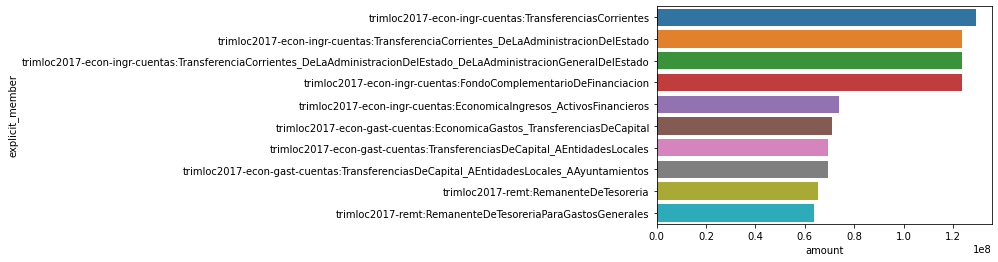

In [29]:
top_10_explicit_member_payments = group_payments_by_explicit_member.head(10)
sns.barplot(x=top_10_explicit_member_payments['amount'], y=top_10_explicit_member_payments.index)

<AxesSubplot:xlabel='amount', ylabel='explicit_member'>

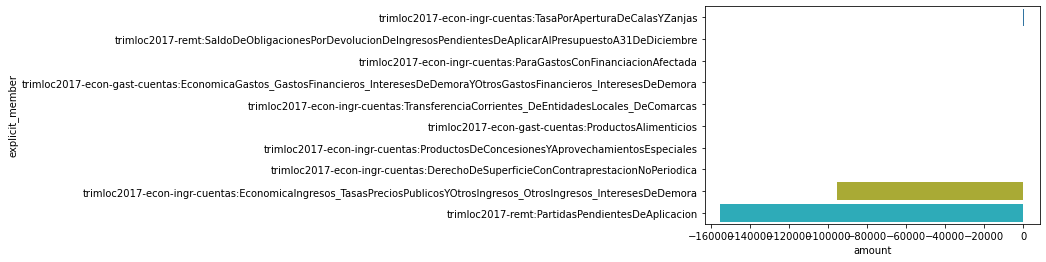

In [30]:
botton_10_explicit_member_payments = group_payments_by_explicit_member.tail(10)
sns.barplot(x=botton_10_explicit_member_payments['amount'], y=botton_10_explicit_member_payments.index)

In [31]:
dimension = all_payments[all_payments.amount != 0.0] # remove before sum to avoid errors
dimension = dimension.groupby('dimension').sum()
dimension = dimension.drop('decimals', axis=1)
dimension = dimension.sort_values(by='amount', ascending=False)
dimension

,amount
dimension,
trimloc2017-econ-ingr:Cuentasdimension,982348050.43
trimloc2017-econ-gast:Cuentasdimension,825167168.01
trimloc2017-remt:FilasdeRemanentedeTesoreriadimension,287242552.08
trimloc2017-anexo5:Filasdimension,972792.19


<AxesSubplot:xlabel='amount', ylabel='dimension'>

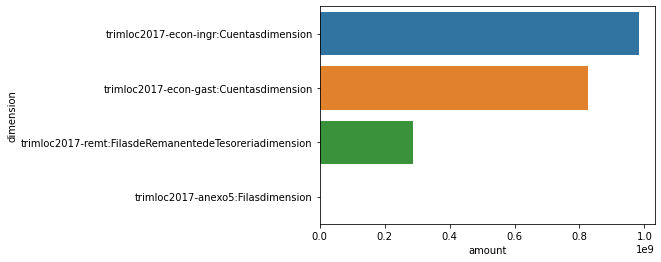

In [32]:
sns.barplot(x=dimension['amount'], y=dimension.index)

In [33]:
typed_member = all_payments[all_payments.amount != 0.0] # remove before sum to avoid errors
typed_member = typed_member.groupby('typed_member_value').sum()
typed_member = typed_member.drop('decimals', axis=1)
typed_member = typed_member.sort_values(by='amount', ascending=False)
typed_member

,amount
typed_member_value,
Transferencia2,849129.68
Transferencia4,95944.02
Transferencia8,26566.85
Transferencia3,776.21
Transferencia7,154.54
Transferencia5,113.50
Transferencia6,96.60
Transferencia1,10.79


<AxesSubplot:xlabel='amount', ylabel='typed_member_value'>

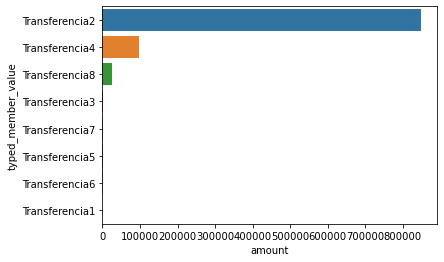

In [34]:
sns.barplot(x=typed_member['amount'], y=typed_member.index)